# Integrantes:
1. Ignacio Morandé
2. Fernando Contreras
3. Alberto Bella

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import *
from plotnine import *

# Entrega el 30 de Junio

# Convolutional Neural Network, Object detection (opción 1)

Una de las ideas aplicaciones de las CNN es su uso para detectar objetos en una imagen. Para esta tarea, usted implementará un detector de objetos básico para una imagen. Para ello

1. Importar la libreria VGG16 de las aplicaciones de keras.
2. Recorrer la imagen utilizando un rectangulo o cuadrado (debería ser un paralelepido dado que la matriz es realmente 3-dimensional) a su elección (2 puntos).
3. Extraiga la imagen, ajustela al tamaño de entrada de la VGG16 y prediga lo que se encuentra en la imagen (2 puntos).
4. Si la imagen tiene un objeto con una probabiblidad sobre un límite que usted determine, agregue un borde al objeto en la imagen (2 puntos).

Por si acaso, se pide una implementación básica y estamos usando una CNN que tiene múltiples salidas, por lo cual, es muy factible que no pueda detectar un perro, debido a que se está clasificando la raza del perro.

En la imagen adjunta, podrá ver un ejemplo del detector de objetos, en la cual se detectó:<br>
limousine :  0.8368878<br>
pickup :  0.7715208<br>
pickup :  0.7670362<br>

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16()
print(model.summary())

553467904/553467096 [==============================] - 4s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

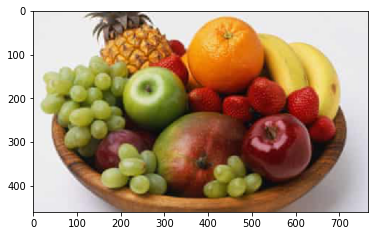

In [107]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

img  = load_img('fruit_bowl.jpg', target_size=(int(2760/6), int(4600/6)))
# img  = load_img('fruit_bowl.jpg', target_size=(int(img.shape[0]*1.7), int(img.shape[1]*1.7)))

plt.imshow(img)
plt.show()

In [ ]:
dim_cuadro = 224
img = img_to_array(img)
height_img = img.shape[0]
width_img = img.shape[1]
img_array = []

# visualizar los tamaños

for i in range(0, height_img-dim_cuadro, int(dim_cuadro/2)):
  for j in range(0, width_img-dim_cuadro, int(dim_cuadro/2)):
    img_cuadro = img[i:i+dim_cuadro, j:j+dim_cuadro]
    img_array.append(img_cuadro.astype('uint8'))
    plt.imshow(img_cuadro.astype('uint8'))
    plt.show()

In [25]:
def drawRectangle(img, x, y, height, width, r):
    # img must be a 3-dimensional array and in RGB order
    # x, y positions belong to left top corner
    # height and width of the square
    # r is the border weight. Must be greater than 0

    if r<=0:
        print('r must be greater than 0')
        return 0

    # right side
    img[y:y+height, x:x+r, :] = 0
    img[y:y+height, x:x+r, 0] = 255

    # left side
    img[y:y+height, x+width:x+width+r, :] = 0
    img[y:y+height, x+width:x+width+r, 0] = 255

    # top side
    img[y:y+r, x:x+width, :] = 0
    img[y:y+r, x:x+width, 0] = 255

    # bottom side
    img[y+height:y+height+r, x:x+width+r, :] = 0
    img[y+height:y+height+r, x:x+width+r, 0] = 255

In [108]:
dim_cuadro = 224
img = img_to_array(img)
height_img = img.shape[0]
width_img = img.shape[1]
pos = []


for i in range(0, height_img-dim_cuadro, int(dim_cuadro/2)):
  for j in range(0, width_img-dim_cuadro, int(dim_cuadro/2)):
    img_cuadro = img[i:i+dim_cuadro, j:j+dim_cuadro]

    # plt.imshow(img_cuadro.astype('uint8'))
    # plt.show()

    img_cuadro_proc = img_to_array(img_cuadro.copy())
    img_cuadro_proc = np.expand_dims(img_cuadro_proc, axis=0)
    img_cuadro_proc = preprocess_input(img_cuadro_proc)
    
    yhat = model.predict(img_cuadro_proc)
    label = decode_predictions(yhat)

    print(label)

    # if label[0][0][1] == 'mouse' and label[0][0][2] > 0.90:
    #   pos.append([i, j])

    if (label[0][0][1] == 'strawberry' or label[0][0][1] == 'pineapple') and label[0][0][2] > 0.70:
       pos.append([i, j])

[[('n12144580', 'corn', 0.62657696), ('n13133613', 'ear', 0.26188305), ('n07753275', 'pineapple', 0.049039077), ('n07711569', 'mashed_potato', 0.0065300683), ('n07720875', 'bell_pepper', 0.0056683086)]]
[[('n07753275', 'pineapple', 0.8688231), ('n13133613', 'ear', 0.048384435), ('n07742313', 'Granny_Smith', 0.034027997), ('n12144580', 'corn', 0.026312634), ('n07745940', 'strawberry', 0.0052742334)]]
[[('n07753275', 'pineapple', 0.7777516), ('n07742313', 'Granny_Smith', 0.07144626), ('n12267677', 'acorn', 0.02569192), ('n13133613', 'ear', 0.0140576195), ('n12144580', 'corn', 0.012615718)]]
[[('n07720875', 'bell_pepper', 0.31745982), ('n07716906', 'spaghetti_squash', 0.18607941), ('n07742313', 'Granny_Smith', 0.10157837), ('n07749582', 'lemon', 0.09716508), ('n07768694', 'pomegranate', 0.06066673)]]
[[('n07745940', 'strawberry', 0.7280788), ('n07753592', 'banana', 0.074525334), ('n07749582', 'lemon', 0.071284495), ('n07720875', 'bell_pepper', 0.031933192), ('n07747607', 'orange', 0.02305

# Detección de Piña y Frutilla
## Se consideró marcar en la fotografía si tenía una probabilidad sobre 0.7 de predicción de piña y frutilla. Esta decisión fue en base como detectaba todas las frutas y como distribuia las probabilidades.

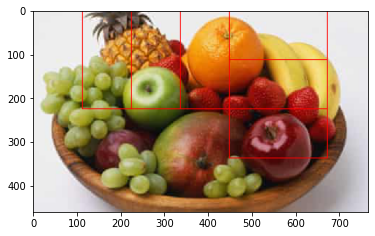

In [109]:
img  = load_img('fruit_bowl.jpg', target_size=(int(2760/6), int(4600/6)))
img = np.array(img)

for p in pos:
  drawRectangle(img, p[1], p[0], 224, 224, 2)

plt.imshow(img)
plt.show()

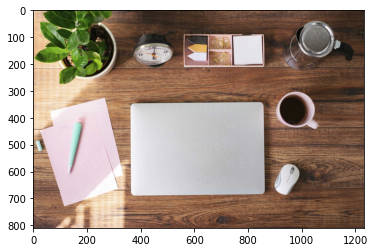

In [121]:
img = load_img('desk.jpg')

plt.imshow(img)
plt.show()

In [115]:
dim_cuadro = 224
img = img_to_array(img)
height_img = img.shape[0]
width_img = img.shape[1]
pos = []


for i in range(0, height_img-dim_cuadro, int(dim_cuadro/2)):
  for j in range(0, width_img-dim_cuadro, int(dim_cuadro/2)):
    img_cuadro = img[i:i+dim_cuadro, j:j+dim_cuadro]

    # plt.imshow(img_cuadro.astype('uint8'))
    # plt.show()

    img_cuadro_proc = img_to_array(img_cuadro.copy())
    img_cuadro_proc = np.expand_dims(img_cuadro_proc, axis=0)
    img_cuadro_proc = preprocess_input(img_cuadro_proc)
    
    yhat = model.predict(img_cuadro_proc)
    label = decode_predictions(yhat)

    print(label)

    if label[0][0][1] == 'mouse' and label[0][0][2] > 0.90:
      pos.append([i, j])

[[('n07753113', 'fig', 0.29682362), ('n03991062', 'pot', 0.20050849), ('n07720875', 'bell_pepper', 0.06612699), ('n07742313', 'Granny_Smith', 0.051548053), ('n12267677', 'acorn', 0.048892874)]]
[[('n03991062', 'pot', 0.94031835), ('n07720875', 'bell_pepper', 0.004731756), ('n07715103', 'cauliflower', 0.0038042653), ('n07714990', 'broccoli', 0.0025584535), ('n07836838', 'chocolate_sauce', 0.0025274567)]]
[[('n07583066', 'guacamole', 0.17363326), ('n04332243', 'strainer', 0.05447601), ('n03706229', 'magnetic_compass', 0.053324394), ('n03775546', 'mixing_bowl', 0.051489837), ('n03991062', 'pot', 0.050745226)]]
[[('n03706229', 'magnetic_compass', 0.83027196), ('n02794156', 'barometer', 0.12212677), ('n04328186', 'stopwatch', 0.012533839), ('n02708093', 'analog_clock', 0.008266652), ('n04548280', 'wall_clock', 0.003218709)]]
[[('n03706229', 'magnetic_compass', 0.4549712), ('n04141975', 'scale', 0.102169506), ('n02910353', 'buckle', 0.06266758), ('n04328186', 'stopwatch', 0.061396077), ('n02

# Detección de 'Mouse'

## En este caso, por lo bien que identificaba el mouse, se decidió fijar como umbral una probabilidad de 0.9, es decir, si el modelo predecía que era un mouse con una probabilidad mayor a la planteada, se marcó en la fotografía.

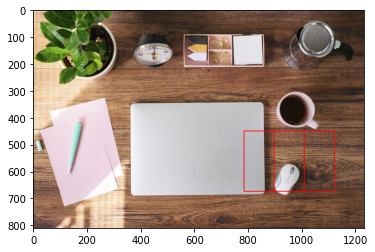

In [122]:
img  = load_img('desk.jpg')
img = np.array(img)

for p in pos:
  drawRectangle(img, p[1], p[0], 224, 224, 3)

plt.imshow(img)
plt.show()

# Convolutional Neural Network, Object detection (opción 2)

Una de las ideas aplicaciones de las CNN es su uso para detectar objetos en una imagen. Para esta tarea, usted implementará un detector de objetos básico para una imagen. Para ello

1. Importar el modelo aprendido para diferenciar entre perros y gatos.
2. Recorrer la imagen utilizando un rectangulo o cuadrado (debería ser un paralelepido dado que la matriz es realmente 3-dimensional) a su elección (2 puntos).
3. Extraiga la imagen, ajustela al tamaño de entrada del modelo y prediga lo que se encuentra en la imagen (2 puntos). 
4. Si la imagen tiene un objeto con una probabiblidad sobre un límite que usted determine, agregue un borde al objeto en la imagen (2 puntos).

Por si acaso, se pide una implementación básica y estamos usando una CNN que aprendió solo entre perros y gatos, por lo cual, es muy factible que pueda detectar múltiples partes de un perro.

En la imagen adjunta, podrá ver un ejemplo del detector de objetos, donde podrá observar que la mayoría de los perros se encuadró más de una vez:<br>